In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

This sets up the font sizes for graph axes, tick marks, and title. 

In [ ]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# **Data Cleanup**

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Determines the percentage of NA values for each column. 

---



In [ ]:
df.isna().sum()/len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [ ]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Groups together required education type by mapping 'required_education' column to a dictionary. 

In [ ]:
course = {'Some High School Coursework': 'Some HS', 'Certification': 'Certification', 'High School or equivalent': 'High School', 
          "Master's Degree": "Master's", 'Professional': 'Professional', 'Unspecified': 'Unspecified', 'Doctorate': 'Doctorate',
          'Some College Coursework Completed': 'Some College', 'Associate Degree': 'Associate', "Bachelor's Degree": "Bachelor's",
          'Vocational': 'Vocational', 'Vocational - Degree': "Bachelor's", 'Vocational - HS Diploma':'High School'}

df['Education_edit'] = df['required_education'].map(course)

# **Fraudulence Analysis**


*   Create a new df that contains the count of fraudulent and non-fraudulent jobs

*   Determine the percentage of fraudulent and non-fraudulent jobs

In [ ]:
df_fraud = df.groupby('fraudulent').agg({'job_id':'count'})
df_fraud = df_fraud.reset_index()

df_fraud['fraud_1k'] = df_fraud['job_id']/len(df)
df_fraud['Title'] = ['Non-Fradulent', 'Fradulent']

df_fraud

,fraudulent,job_id,fraud_1k,Title
0,0,17014,0.951566,Non-Fradulent
1,1,866,0.048434,Fradulent


Plot a  bar graph of Percentage of Fraudulent vs Non-Fraudulent Jobs 

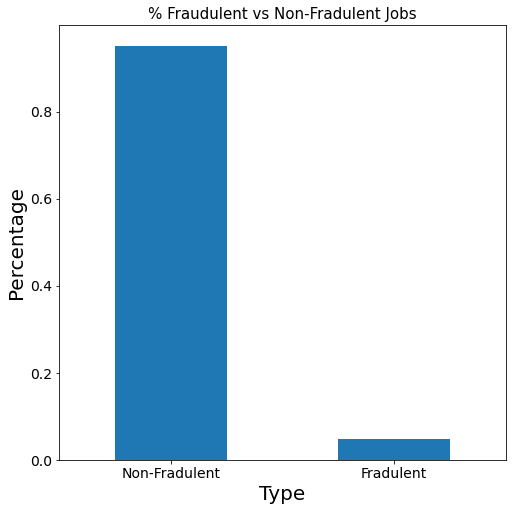

In [ ]:
df_fraud.plot(x='Title',
              y='fraud_1k',
              kind='bar',
              xlabel='Type',
              ylabel='Percentage',
              title='% Fraudulent vs Non-Fradulent Jobs',
              legend=False, 
              fontsize=14,
              rot=0,
              figsize=(8,8))

# **Industry Analysis**


*   Create a new df that contains the number of fradulent jobs and total jobs per industry

*   Only includes industries with a total number of jobs greater than 25 (median is 29)

*   Determine the number of fraudulent jobs per 1K jobs

In [ ]:
df_industry = df.groupby('industry').agg({'fraudulent':'sum', 'job_id':'count'})
df_industry = df_industry.reset_index()

df_industry = df_industry[df_industry['job_id'] >= 25]

df_industry['% fraud'] = (df_industry['fraudulent']/df_industry['job_id']) * 1000

Sort the values by the number of fraudulent jobs per 1K

In [ ]:
df_industry = df_industry.sort_values(by='% fraud', ascending=False)
df_industry.head(10)

,industry,fraudulent,job_id,% fraud
88,Oil & Energy,109,287,379.790941
0,Accounting,57,159,358.490566
67,"Leisure, Travel & Tourism",21,76,276.315789
21,Computer Networking,12,44,272.727273
52,Hospitality,14,88,159.090909
107,Real Estate,24,175,137.142857
49,"Health, Wellness and Fitness",15,127,118.110236
76,Mechanical or Industrial Engineering,4,37,108.108108
9,Biotechnology,4,38,105.263158
51,Hospital & Health Care,51,497,102.615694


Plot a horizontal bar graph of Industry vs. Number of Fraudulent Jobs per 1K

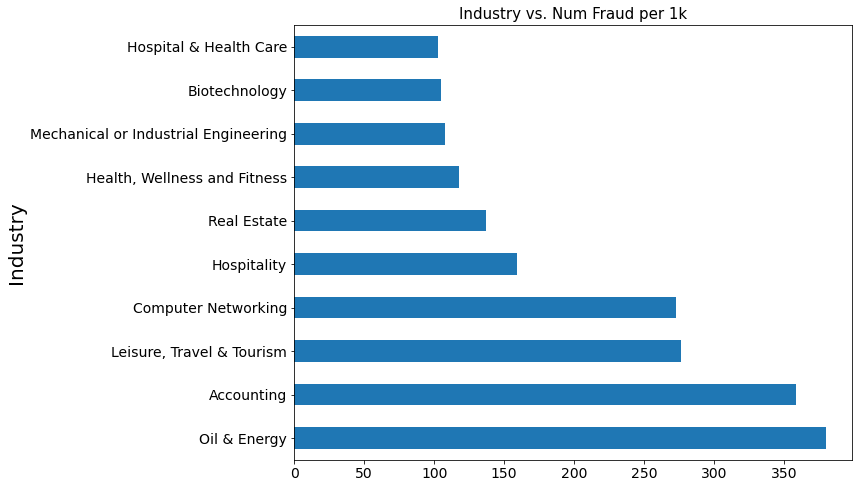

In [ ]:
df_industry[:10].plot(x='industry',
                 y='% fraud',
                 kind='barh',
                 xlabel='Industry',
                 ylabel='# Fraud per 1k',
                 title='Industry vs. Num Fraud per 1k',
                 legend=False, 
                 fontsize=14,
                 figsize=(10,8))

# **Employment Type Analysis**


*   Create a new df that contains the number of fradulent jobs and total jobs per **employment type**

*   Determine the number of fraudulent jobs per 1K jobs

In [ ]:
df_employment_type = df.groupby('employment_type').agg({'fraudulent':'sum', 'job_id':'count'})
df_employment_type = df_employment_type.reset_index()

df_employment_type['% fraud'] = (df_employment_type['fraudulent']/df_employment_type['job_id']) * 1000

Sort the values by the number of fraudulent jobs per 1K

In [ ]:
df_employment_type = df_employment_type.sort_values(by='% fraud', ascending=False)
df_employment_type

,employment_type,fraudulent,job_id,% fraud
3,Part-time,74,797,92.848181
2,Other,15,227,66.079295
1,Full-time,490,11620,42.168675
0,Contract,44,1524,28.871391
4,Temporary,2,241,8.298755


Plot a bar graph of Employment Type vs. Number of Fraudulent Jobs per 1K

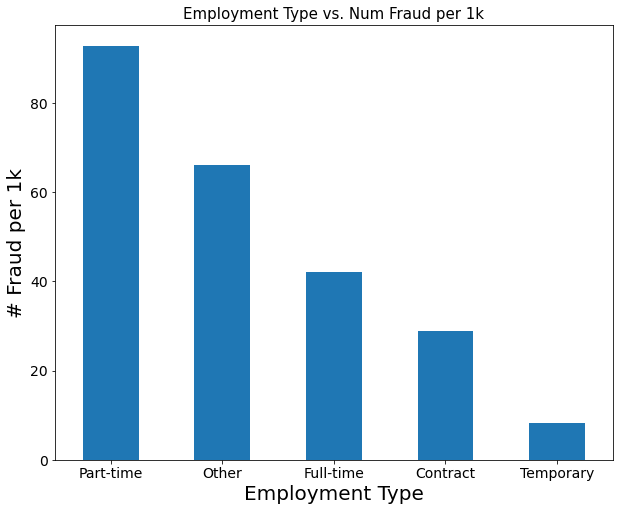

In [ ]:
df_employment_type.plot(x='employment_type',
                        y='% fraud',
                        kind='bar',
                        xlabel='Employment Type',
                        ylabel='# Fraud per 1k',
                        title='Employment Type vs. Num Fraud per 1k',
                        legend=False, 
                        fontsize=14,
                        rot=0,
                        figsize=(10,8))

# **Required Experience Analysis**


*   Create a new df that contains the number of fradulent jobs and total jobs per **required experience**

*   Determine the number of fraudulent jobs per 1K jobs

In [ ]:
df_required_experience = df.groupby('required_experience').agg({'fraudulent':'sum', 'job_id':'count'})
df_required_experience = df_required_experience.reset_index()

df_required_experience['% fraud'] = (df_required_experience['fraudulent']/df_required_experience['job_id']) * 1000

Sort the values by the number of fraudulent jobs per 1K

In [ ]:
df_required_experience = df_required_experience.sort_values(by='% fraud', ascending=False)
df_required_experience

,required_experience,fraudulent,job_id,% fraud
3,Executive,10,141,70.921986
2,Entry level,179,2697,66.370041
6,Not Applicable,60,1116,53.763441
1,Director,17,389,43.701799
5,Mid-Senior level,113,3809,29.666579
4,Internship,10,381,26.246719
0,Associate,42,2297,18.284719


Plot a bar graph of Required Experience vs. Number of Fraudulent Jobs per 1K

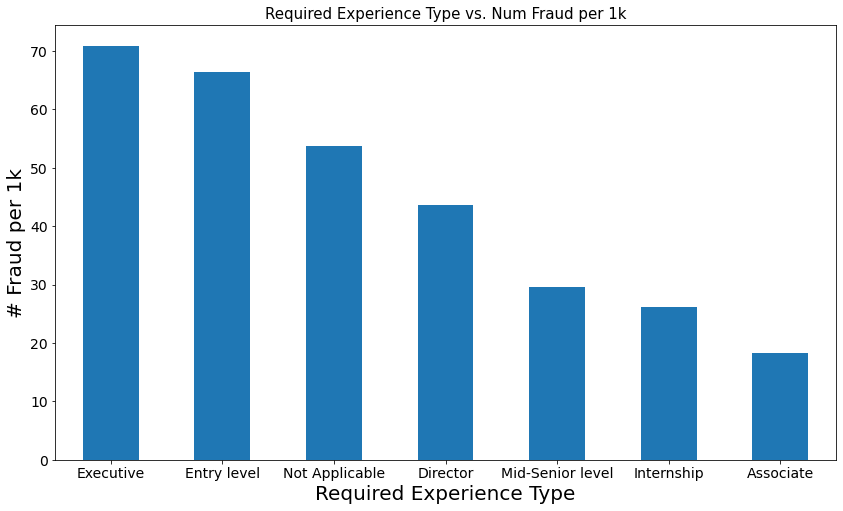

In [ ]:
df_required_experience.plot(x='required_experience',
                            y='% fraud',
                            kind='bar',
                            xlabel='Required Experience Type',
                            ylabel='# Fraud per 1k',
                            title='Required Experience Type vs. Num Fraud per 1k',
                            legend=False, 
                            fontsize=14,
                            rot=0,
                            figsize=(14,8))

# **Required Education Analysis**


*   Create a new df that contains the number of fradulent jobs and total jobs per **required education**

*   Determine the number of fraudulent jobs per 1K jobs

In [ ]:
df_required_education = df.groupby('Education_edit').agg({'fraudulent':'sum', 'job_id':'count'})
df_required_education = df_required_education.reset_index()

df_required_education['% fraud'] = (df_required_education['fraudulent']/df_required_education['job_id']) * 1000
df_required_education['% job'] = df_required_education['job_id']/len(df)

Remove the value 'Vocational' (did not have any impact)

In [ ]:
df_required_education = df_required_education[~(df_required_education['Education_edit'] == 'Vocational')]

Sort the values by the number of fraudulent jobs per 1K

In [ ]:
df_required_education = df_required_education.sort_values(by='% fraud', ascending=False)
df_required_education

,Education_edit,fraudulent,job_id,% fraud,% job
8,Some HS,20,27,740.740741,0.001510
2,Certification,19,170,111.764706,0.009508
4,High School,170,2089,81.378650,0.116834
5,Master's,31,416,74.519231,0.023266
6,Professional,4,74,54.054054,0.004139
9,Unspecified,61,1397,43.664996,0.078132
3,Doctorate,1,26,38.461538,0.001454
7,Some College,3,102,29.411765,0.005705
0,Associate,6,274,21.897810,0.015324
1,Bachelor's,100,5151,19.413706,0.288087


Plot a bar graph of Required Education vs. Number of Fraudulent Jobs per 1K

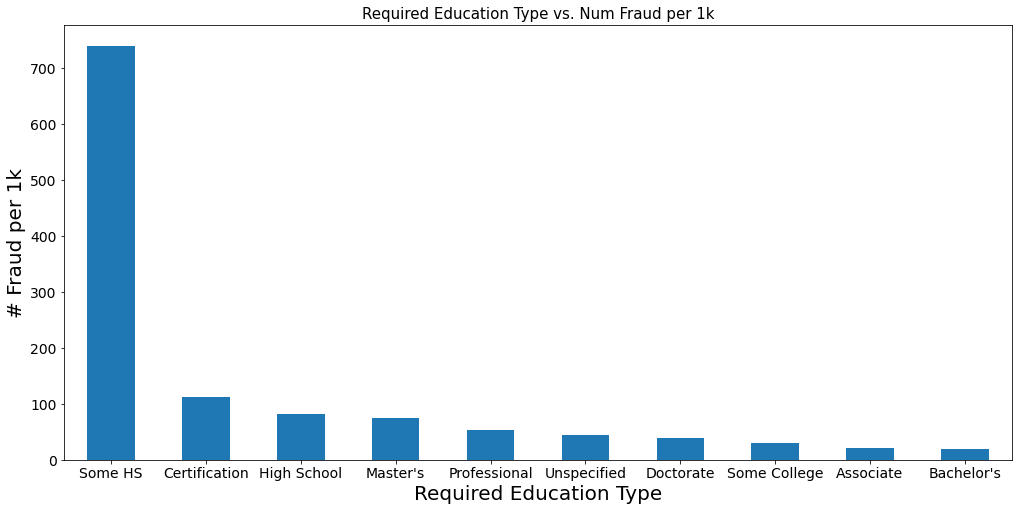

In [ ]:
df_required_education.plot(x='Education_edit',
                            y='% fraud',
                            kind='bar',
                            xlabel='Required Education Type',
                            ylabel='# Fraud per 1k',
                            title='Required Education Type vs. Num Fraud per 1k',
                            legend=False, 
                            fontsize=14,
                            rot=0,
                            figsize=(17,8))

In [ ]:
df_fraud = df.groupby('fraudulent').agg({'job_id':'count'})
df_fraud['fraud_1k'] = df_fraud['job_id']/len(df)
df_fraud = df_fraud.reset_index()
df_fraud['Title'] = ['Non-Fradulent', 'Fradulent']
df_fraud

,fraudulent,job_id,fraud_1k,Title
0,0,17014,0.951566,Non-Fradulent
1,1,866,0.048434,Fradulent


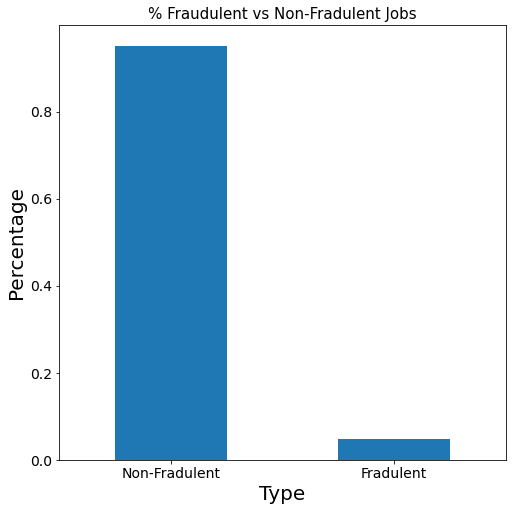

In [ ]:
df_fraud.plot(x='Title',
              y='fraud_1k',
              kind='bar',
              xlabel='Type',
              ylabel='Percentage',
              title='% Fraudulent vs Non-Fradulent Jobs',
              legend=False, 
              fontsize=14,
              rot=0,
              figsize=(8,8))

# **Textual Data Analysis**

Create a new df with only textual data columns

In [ ]:
new_df=df[['description','company_profile','requirements','benefits', 'fraudulent']]

Create new columns with the character length of each textual data column

In [ ]:
new_df['description_n']= new_df['description'].str.len()
new_df['company_profile_n']= df['company_profile'].str.len()
new_df['requirements_n']= df['requirements'].str.len()
new_df['benefits_n'] = df['benefits'].str.len()

<ipython-input-26-179b871a212b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['description_n']= new_df['description'].str.len()
<ipython-input-26-179b871a212b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['company_profile_n']= df['company_profile'].str.len()
<ipython-input-26-179b871a212b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Fill all NA values with 0

In [ ]:
new_df = new_df.fillna(0)

In [ ]:
new_df.head()

,description,company_profile,requirements,benefits,fraudulent,description_n,company_profile_n,requirements_n,benefits_n
0,"Food52, a fast-growing, James Beard Award-winn...","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,0,905.0,885.0,852.0,0.0
1,Organised - Focused - Vibrant - Awesome!Do you...,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,2077.0,1286.0,1433.0,1292.0
2,"Our client, located in Houston, is actively se...",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,0,355.0,879.0,1363.0,0.0
3,THE COMPANY: ESRI – Environmental Systems Rese...,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,2600.0,614.0,1429.0,782.0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1520.0,1628.0,757.0,21.0


Create a df for the median character length for the **benefits column** of fraudulent vs. non-fraudulent jobs

In [ ]:
df_benefits = new_df.groupby('fraudulent').agg({'benefits_n':'median'})
df_benefits = df_benefits.reset_index()

df_benefits

,fraudulent,benefits_n
0,0,47.0
1,1,36.0


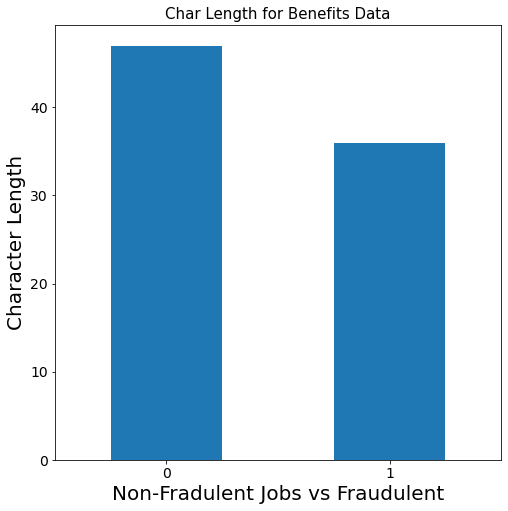

In [ ]:
df_benefits.plot(x='fraudulent',
                y='benefits_n',
                kind='bar',
                xlabel='Non-Fradulent Jobs vs Fraudulent',
                ylabel='Character Length',
                title='Char Length for Benefits Data',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

Create a df for the median character length for the **company profile column** of fraudulent vs. non-fraudulent jobs

In [ ]:
df_company_profile = new_df.groupby('fraudulent').agg({'company_profile_n':'median'})
df_company_profile = df_company_profile.reset_index()

df_company_profile

,fraudulent,company_profile_n
0,0,588.0
1,1,0.0


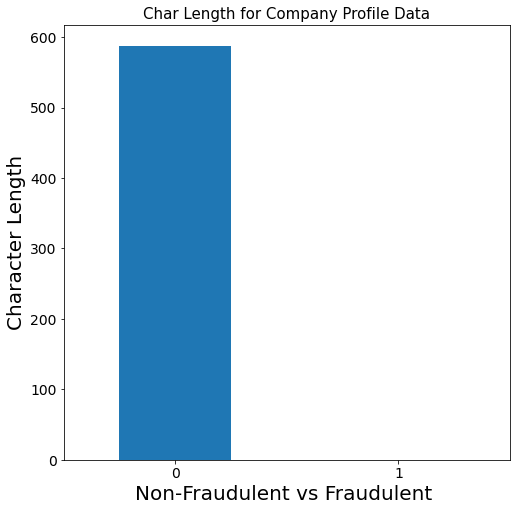

In [ ]:
df_company_profile.plot(x='fraudulent',
                y='company_profile_n',
                kind='bar',
                xlabel='Non-Fraudulent vs Fraudulent ',
                ylabel='Character Length',
                title='Char Length for Company Profile Data',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

Create a df for the median character length for the **requirements column** of fraudulent vs. non-fraudulent jobs

In [ ]:
df_requirements = new_df.groupby('fraudulent').agg({'requirements_n':'median'})
df_requirements = df_requirements.reset_index()

df_requirements

,fraudulent,requirements_n
0,0,476.5
1,1,249.0


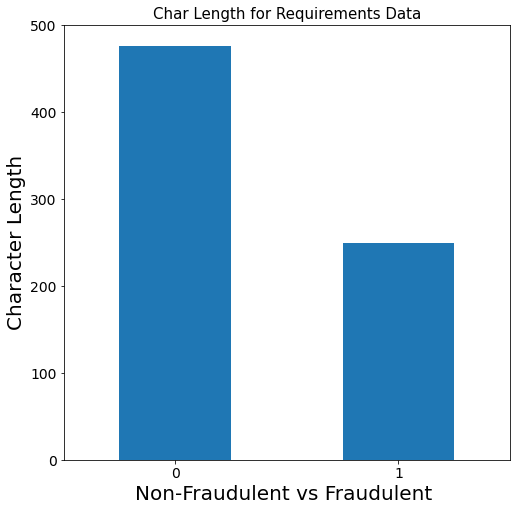

In [ ]:
df_requirements.plot(x='fraudulent',
                y='requirements_n',
                kind='bar',
                xlabel='Non-Fraudulent vs Fraudulent ',
                ylabel='Character Length',
                title='Char Length for Requirements Data',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

Create a df for the median character length for the **description column** of fraudulent vs. non-fraudulent jobs

In [ ]:
df_description = new_df.groupby('fraudulent').agg({'description_n':'median'})
df_description = df_description.reset_index()

df_description

,fraudulent,description_n
0,0,1027.0
1,1,844.5


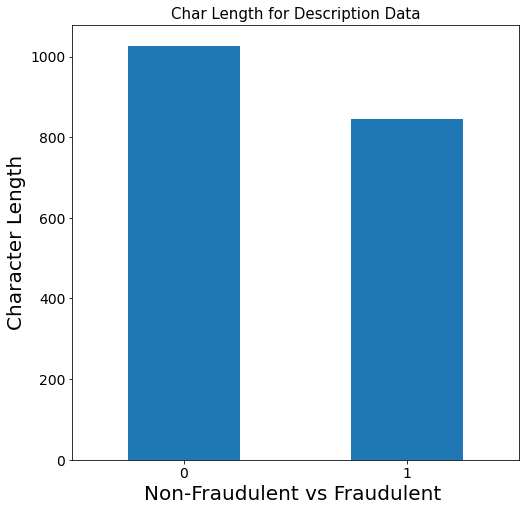

In [ ]:
df_description.plot(x='fraudulent',
                y='description_n',
                kind='bar',
                xlabel='Non-Fraudulent vs Fraudulent ',
                ylabel='Character Length',
                title='Char Length for Description Data',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

Combine all of the feature columns to feed into feature model 

In [ ]:
df['is_fraud_industry'] = (df['industry'] == 'Oil & Energy') | (df['industry'] == 'Accounting') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Biotechnology') | (df['industry'] == 'Hospital & Health Care')
df['is_part_time'] = df['employment_type'] == 'Part-time'
df['is_high_school_cw'] = df['required_education'] == 'Some High School Coursework'
df['is_executive_entry'] = (df['required_experience'] == 'Executive') | (df['required_experience'] == 'Entry level')